In [2]:
import numpy as np
import pandas as pd

## Understanding the data

In [ ]:
df=pd.read_csv('ApexCare_General_Hospital .csv')
df.head()
df.tail()
df.shape
df.info()
df.describe()  #summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4999 non-null   int64  
 1   Gender              4999 non-null   object 
 2   Blood Type          4999 non-null   object 
 3   Medical Condition   4999 non-null   object 
 4   Date of Admission   4999 non-null   object 
 5   Insurance Provider  4999 non-null   object 
 6   Billing Amount      4999 non-null   float64
 7   Room Number         4999 non-null   int64  
 8   Admission Type      4999 non-null   object 
 9   Discharge Date      4999 non-null   object 
 10  Test Results        4999 non-null   object 
 11  Admission Year      4999 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 468.8+ KB


,Age,Billing Amount,Room Number,Admission Year
count,4999.000000,4999.00000,4999.000000,4999.000000
mean,50.393479,25294.65894,301.359272,2021.326065
std,17.285280,15652.20462,116.403789,1.485323
min,13.000000,6.11000,101.000000,2019.000000
25%,38.000000,11625.84000,202.000000,2020.000000
50%,50.000000,24982.67000,301.000000,2021.000000
75%,64.000000,38987.45000,403.000000,2023.000000
max,88.000000,52760.52000,499.000000,2024.000000


### Data Cleaning

In [4]:
# Converting date to datetime
df['Date of Admission']=pd.to_datetime(df['Date of Admission'])
df['Discharge Date']=pd.to_datetime(df['Discharge Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 4999 non-null   int64         
 1   Gender              4999 non-null   object        
 2   Blood Type          4999 non-null   object        
 3   Medical Condition   4999 non-null   object        
 4   Date of Admission   4999 non-null   datetime64[ns]
 5   Insurance Provider  4999 non-null   object        
 6   Billing Amount      4999 non-null   float64       
 7   Room Number         4999 non-null   int64         
 8   Admission Type      4999 non-null   object        
 9   Discharge Date      4999 non-null   datetime64[ns]
 10  Test Results        4999 non-null   object        
 11  Admission Year      4999 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 468.8+ KB


In [5]:
# Checking for duplicate rows

duplicate = df.duplicated().sum()
print(duplicate)
df.isnull().sum()

0


Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Test Results          0
Admission Year        0
dtype: int64

In [6]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

## Calculating duration of stay(column)
Calculating Length of Stay (in days) for each patient by subtracting the admission date from the discharge date. Previewing the data helps confirm the new column was created correctly.

In [7]:
 # Compute length of stay in days from admission to discharge
df['length of stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df.head()



,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Test Results,Admission Year,length of stay
0,52,Female,O+,Asthma,2021-04-02,Cigna,17895.23,369,Elective,2021-04-22,Abnormal,2021,20
1,56,Male,O+,Obesity,2020-03-31,Aetna,33399.51,162,Emergency,2020-03-25,Abnormal,2020,-6
2,74,Female,B-,Arthritis,2020-08-25,Blue Cross,21886.40,372,Elective,2020-09-10,Normal,2020,16
3,86,Male,O-,Cancer,2024-01-14,UnitedHealthcare,45417.88,410,Urgent,2024-02-18,Normal,2024,35
4,60,Male,A-,Obesity,2022-07-14,Aetna,49467.81,130,Emergency,2022-07-11,Abnormal,2022,-3


#### Identifying Invalid Length of Stay Records

This filters the dataset to find records with a negative length of stay, which typically indicates date errors or data quality issues that need cleaning before analysis.

In [20]:
# finds rows with missing values(negative length of stay)
df[df["length of stay"] < 0][                    # Filter rows where length of stay is missing
    ["Date of Admission", "Discharge Date", "length of stay"]   # Select relevant date and stay columns for inspection
]


,Date of Admission,Discharge Date,length of stay
1,2020-03-31,2020-03-25,-6
4,2022-07-14,2022-07-11,-3
11,2020-03-11,2020-02-25,-15
23,2020-05-25,2020-05-09,-16
25,2021-04-20,2021-03-28,-23
...,...,...,...
4953,2019-10-20,2019-10-07,-13
4969,2020-09-09,2020-09-02,-7
4985,2020-05-23,2020-05-10,-13
4992,2020-07-01,2020-06-28,-3


##### Handling Invalid Length of Stay Values - This replaces negative length of stay values with NaN, ensuring the data remains clean and preventing incorrect values from affecting analysis.

In [ ]:
# Replace negative length of stay values with NaN
df.loc[df['length of stay'] < 0, 'length of stay'] = np.nan 
df.info()  #summary statistics after replacing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 4999 non-null   int64         
 1   Gender              4999 non-null   object        
 2   Blood Type          4999 non-null   object        
 3   Medical Condition   4999 non-null   object        
 4   Date of Admission   4999 non-null   datetime64[ns]
 5   Insurance Provider  4999 non-null   object        
 6   Billing Amount      4999 non-null   float64       
 7   Room Number         4999 non-null   int64         
 8   Admission Type      4999 non-null   object        
 9   Discharge Date      4999 non-null   datetime64[ns]
 10  Test Results        4999 non-null   object        
 11  Admission Year      4999 non-null   int64         
 12  length of stay      4093 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), obje

## Data Analysis
#### Admission type analysis
 Elective admissions are planned, urgent admissions need quick attention, and emergency admissions are life-threatening and very urgent. This counts how many times each admission type appears in the dataset and then calculates the total number of admissions to confirm completeness of the data.

In [ ]:
#Admission type analysis
 # Count the number of occurrences for each unique admission type
admission_type_counts = df['Admission Type'].value_counts()   
print(admission_type_counts)     # Print the count of each admission type
print(admission_type_counts.sum())         # Print the total number of admissions (sum of all counts)


Admission Type
Elective     1719
Urgent       1653
Emergency    1627
Name: count, dtype: int64
4999


### Visualizing Admission Types 
This helps you quickly compare the frequency of different admission types. A count plot makes it easy to spot the most common admission categories at a glance

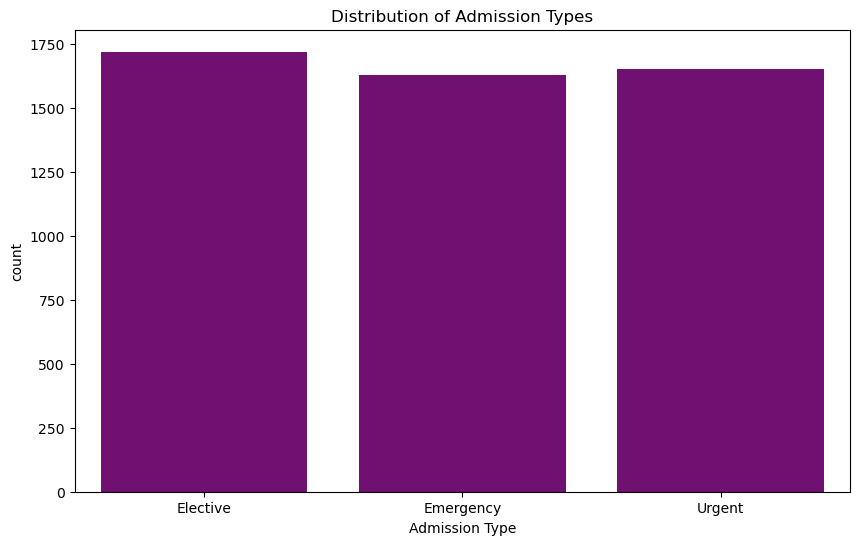

In [11]:
## Visualizing admission types
plt.figure(figsize=(10,6))                 # Create a figure with specified width and height
sns.countplot(data=df, x='Admission Type', color='purple')   # Plot count of each admission type in purple
plt.title('Distribution of Admission Types')    # Set the title of the plot
plt.xlabel('Admission Type')
plt.savefig('Distribution of Admission Types.png')                   # Label the x-axis
plt.show()                                      # Display the plot

### Age Distribution of Patients 
This histogram shows how patient ages are distributed across the dataset. It helps identify common age ranges, skewness, and whether the data is concentrated around certain age groups.

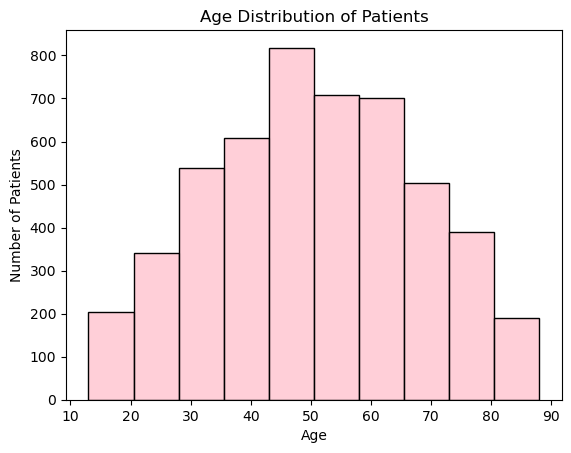

In [12]:
# Age distribution analysis using histogram   Note:sns=seaborn
plt.figure()                              # Create a new figure
sns.histplot(df["Age"], bins=10, color="pink")   # Plot age distribution histogram using seaborn
plt.title("Age Distribution of Patients")       # Set the title of the plot
plt.xlabel("Age")                               # Label the x-axis
plt.ylabel("Number of Patients")                # Label the y-axis
plt.savefig("Age Distribution of Patients.png")   # Save the plot as a PNG file
plt.show()                                      # Display the plot

### Billing Amount Distribution 
This histogram visualizes how billing amounts are spread across patients. It helps identify common charge ranges, skewness, and potential high-cost outliers.

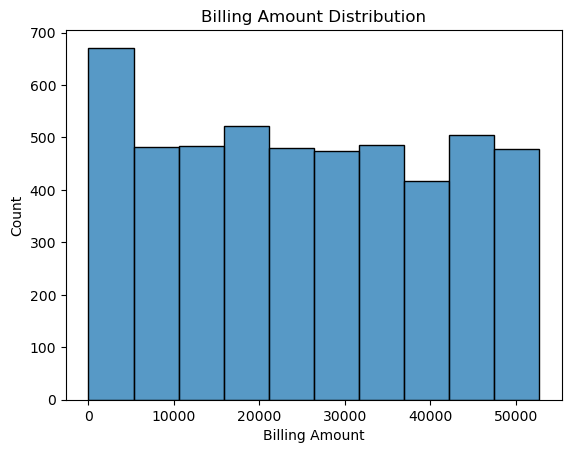

In [13]:
# Billing Amount distribution
plt.figure()
sns.histplot(df["Billing Amount"], bins=10)
plt.title("Billing Amount Distribution")
plt.xlabel("Billing Amount")
plt.savefig('Billing Amount Distribution.png')
plt.show()

### Billing Amount Distribution with KDE 
 This visualization combines a histogram with a Kernel Density Estimate (KDE) curve to show both the actual distribution of billing amounts and the overall density trend, making patterns and skewness easier to interpret.

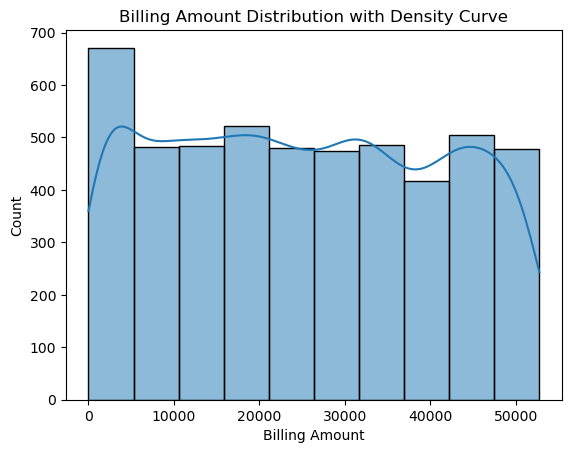

In [14]:
# Adding a KDE
plt.figure()                                            # Create a new figure
sns.histplot(df["Billing Amount"], bins=10, kde=True)   # Plot histogram with a density (KDE) curve
plt.title("Billing Amount Distribution with Density Curve")   # Set the title of the plot
plt.xlabel("Billing Amount")                            # Label the x-axis
plt.savefig('Billing Amount Distribution with Density Curve.png')  # Save the plot as a PNG file
plt.show()                                              # Display the plot

### Medical Conditions Frequency
This counts how often each medical condition appears in the dataset, helping identify the most common conditions treated and providing context for further analysis or visualization.

In [ ]:
#medical conditions analysis
df["Medical Condition"].value_counts()

Medical Condition
Diabetes        855
Obesity         847
Asthma          832
Cancer          824
Hypertension    823
Arthritis       818
Name: count, dtype: int64

### Most Common Medical Conditions 
This count plot visualizes the frequency of medical conditions, ordered from the most common to least common, making it easy to identify which conditions occur most often in the dataset.

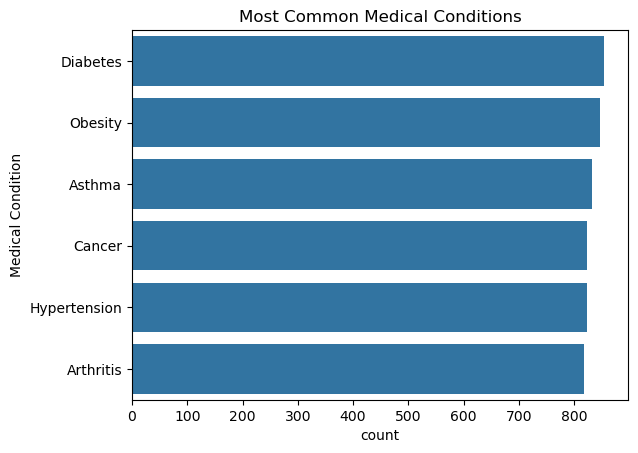

In [15]:
plt.figure()                                                                 # Create a new figure
sns.countplot(data=df, y='Medical Condition',                                 # Plot count of each medical condition
              order=df['Medical Condition'].value_counts().index)             # Order bars by frequency (most common first)
plt.title('Most Common Medical Conditions')                                    # Set the title of the plot
plt.savefig('Most Common Medical Conditions.png')                            # Save the plot as a PNG file
plt.show()                                                                     # Display the plot

### Boxplot
A boxplot was used to visualize the distribution of hospital stay lengths and to easily identify unusually long or short stays.

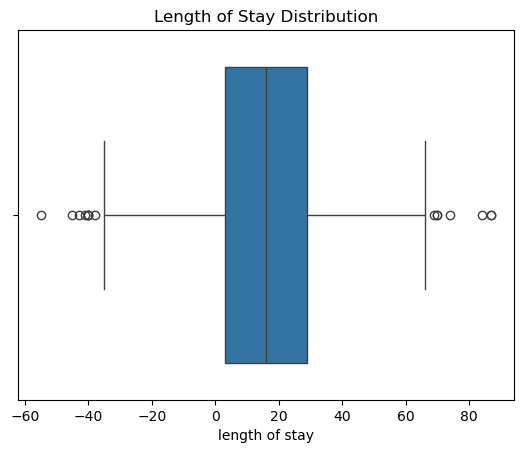

In [16]:
plt.figure()                                   # Create a new figure
sns.boxplot(x=df["length of stay"])            # Visualize the distribution and outliers of length of stay
plt.title("Length of Stay Distribution")       # Set the title of the plot
plt.savefig("Length of Stay Distribution.png")   # Save the plot as a PNG file
plt.show()                                     # Display the plot

### Average Billing Amount by Insurance Provider
This shows the average billing amount for each insurance provider, sorted from highest to lowest. It helps identify which providers are associated with higher or lower charges, making comparisons easier and supporting informed decisions when choosing an insurance provider

In [ ]:
#Insurance Provider analysis
df.groupby('Insurance Provider')['Billing Amount'].mean() \
    .sort_values(ascending=False) \
    .round(2)       # Calculate and display the average billing amount per insurance provider (sorted highest to lowest, rounded to 2 decimals)


Insurance Provider
Medicare            26221.45
Aetna               25586.15
Cigna               25368.55
Blue Cross          24600.81
UnitedHealthcare    24595.69
Name: Billing Amount, dtype: float64

### Count of Test Results 
This shows the frequency of each unique test result in the dataset. It’s useful for quickly seeing which results are most common.

In [ ]:
df['Test Results'].value_counts()     # Count the number of occurrences for each unique test result

Test Results
Inconclusive    1705
Normal          1680
Abnormal        1614
Name: count, dtype: int64